# disordered Anderson system of system size 20x20x20 
# author : Wassim Swaileh
# ETIS Lab UMR 8051, CY Cergy Paris University, ENSEA, CNRS
# Version number : 0.0
# Date : 28/11/2020

### 1. import libraries

In [1]:
import os
import glob
import bz2
from bz2 import BZ2File as bzopen
import codecs
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import *
import numpy as np
import numpy as np
from sklearn.model_selection import ShuffleSplit
from keras.utils import to_categorical
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataname = 'data-L20-8000-RAW-DATA-W15.0-W18.0'
data_path='./data'
modelname = '/model_'+dataname+'.h5'
modelpath = './model'+modelname
historyname = '/history_'+dataname+'.pkl'
historypath = './model'+historyname

### 2. generate dumy data

In [4]:
data_path='./data'
example=[]
label=[]
all_subdirs = [d for d in os.listdir('./data')]
#print(all_subdirs)
for c_indx, clss in enumerate(all_subdirs):
    print(c_indx, clss)
    all_files = glob.glob('./data/'+clss+'/*/*/*.raw.bz2')
    for e in all_files:
        # reading a bz2 archive
        with bzopen(all_files[0], "r") as bzfin:
            """ Handle lines here """
            lines = []
            for i, line in enumerate(bzfin):
                lines.append(float(line.rstrip()))
        example.append(lines)
        if c_indx == 0:
            #label.append([1., 0.])
            label.append(c_indx)
        elif c_indx == 1:
            #label.append([0., 1.])
            label.append(c_indx)

#lines

0 W15.0
1 W18.0


In [5]:
X_sparse = coo_matrix(example)
X = np.asarray(example, dtype=np.float32)
#y = np.asarray(label, dtype=np.float32)
y = to_categorical(np.array(label))
# data shuffeling
X, X_sparse, y = shuffle(X, X_sparse, y, random_state=0)
# train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Dense layer Model architecture

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [7]:
model.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 516,354
Trainable params: 516,354
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history =[]
history = model.fit(X_train, y_train,
                epochs=20,
                batch_size=64,
                verbose = 1,
                validation_split = 0.2,
                shuffle = False
                #validation_data=(X_test, y_test),
                #   callbacks=[history]
                )

Epoch 1/20
93/93 [==============================] - 2s 21ms/step - loss: 0.3321 - accuracy: 0.9690 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 2/20
93/93 [==============================] - 2s 19ms/step - loss: 0.0274 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/20
93/93 [==============================] - 2s 18ms/step - loss: 0.0129 - accuracy: 0.9992 - val_loss: 3.3520e-04 - val_accuracy: 1.0000
Epoch 4/20
93/93 [==============================] - 2s 17ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4403e-04 - val_accuracy: 1.0000
Epoch 5/20
93/93 [==============================] - 2s 18ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 6.9784e-05 - val_accuracy: 1.0000
Epoch 6/20
93/93 [==============================] - 2s 17ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 4.0526e-05 - val_accuracy: 1.0000
Epoch 7/20
93/93 [==============================] - 2s 17ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.5134e-05 - val_accuracy: 

In [9]:
# I'll now calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

100/100 [==============================] - 3s 27ms/step - loss: 9.0014e-07 - accuracy: 1.0000
Test_Accuracy: 100.00%


In [10]:
model.save(modelpath) 

## testing the quality of the learned model
### training history

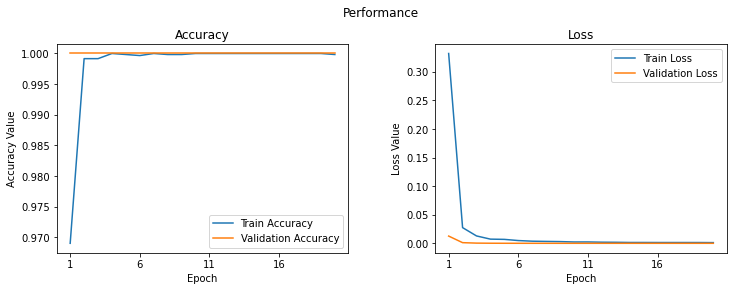

In [11]:
# evaluate model
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [29]:
model.predict(X_test[50:51], batch_size=None, verbose=0, steps=None)

array([[1.0000000e+00, 2.9151874e-09]], dtype=float32)

In [30]:
y_test[50]

array([1., 0.], dtype=float32)